In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zJSUeg63pbdwnDgw2TJ7ZRPDIhoJAeNK" -O data.csv && rm -rf /tmp/cookies.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [3]:
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [4]:
data = pd.read_csv('jm1.csv')

In [5]:
defect_true_false = data.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  8779
True:  2106


In [6]:
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

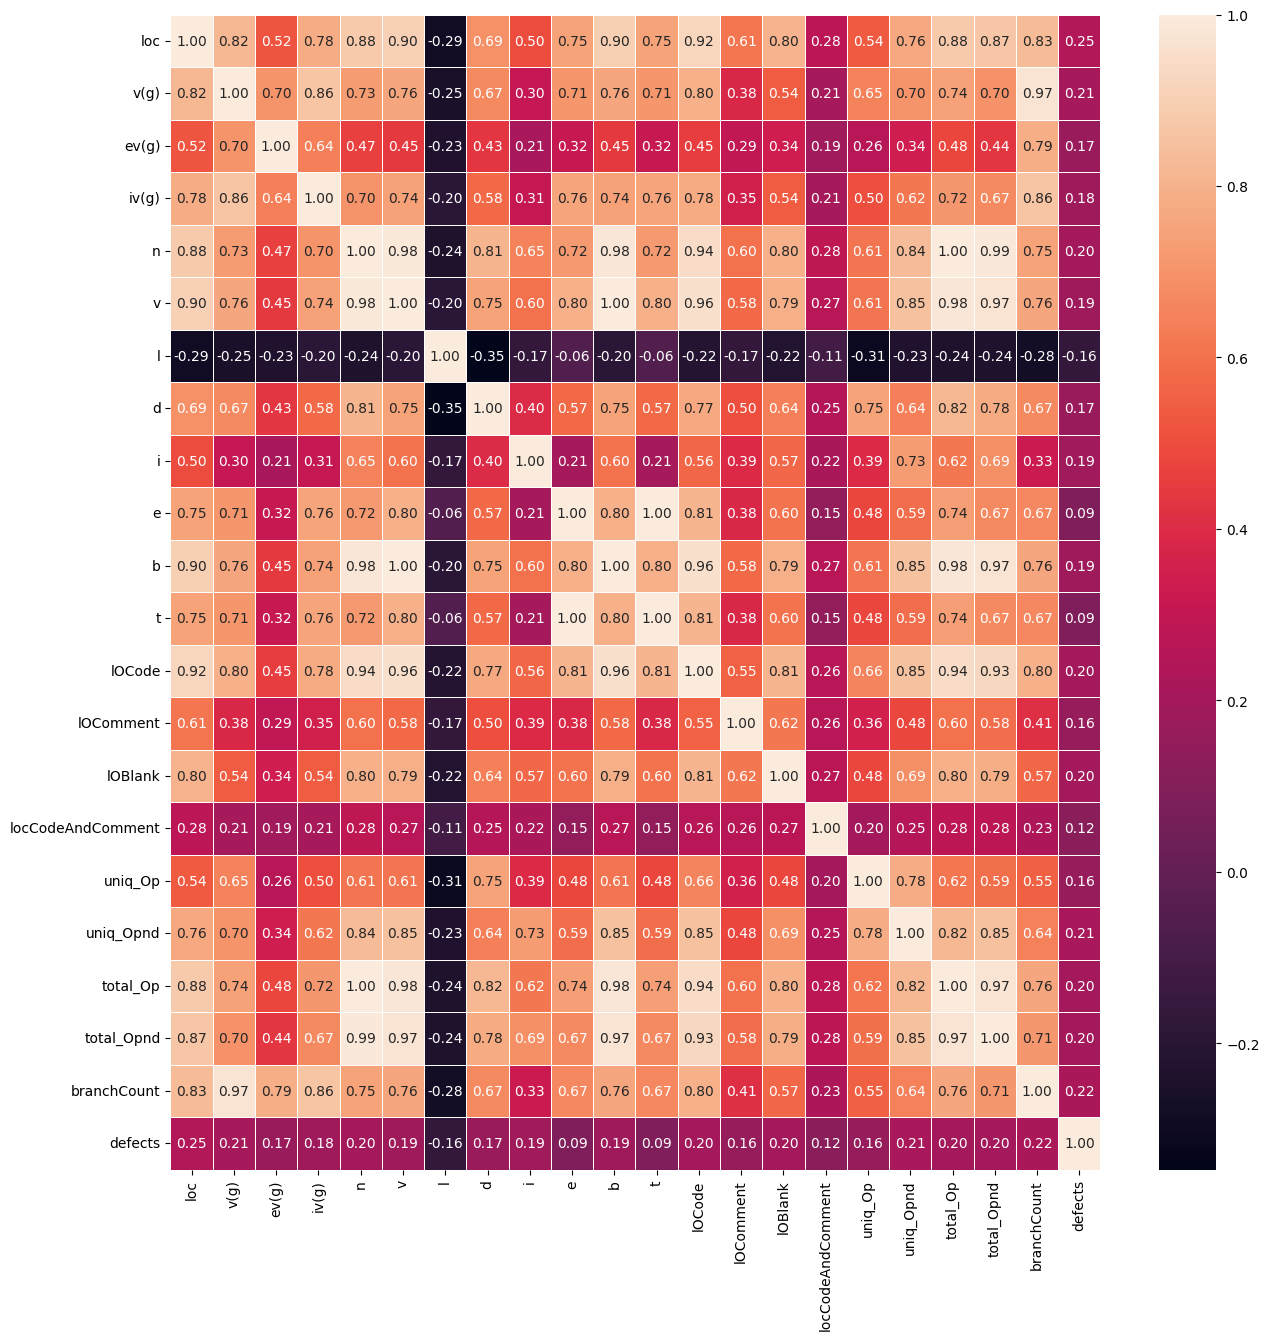

In [7]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [8]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

In [9]:
data.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [10]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

In [11]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]


evaluation_control(data)
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,17.0,36.0,112.0,86.0,13.0,True,Redesign
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,17.0,135.0,329.0,271.0,5.0,True,Redesign
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,11.0,16.0,76.0,50.0,7.0,True,Succesful


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [13]:
data.groupby("complexityEvaluation").size()

complexityEvaluation
Redesign     1725
Succesful    9160
dtype: int64

In [14]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

In [15]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17.0,36.0,112.0,86.0,13.0,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17.0,135.0,329.0,271.0,5.0,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11.0,16.0,76.0,50.0,7.0,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10.0,15.0,30.0,22.0,7.0,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12.0,8.0,19.0,11.0,3.0,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18.0,15.0,59.0,44.0,7.0,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9.0,8.0,21.0,15.0,1.0,False,Succesful,0.001820,0.001855


In [16]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,0.002987,0.002968
10881,129.66,0.04,0.001604,0.001484
10882,519.57,0.17,0.006427,0.006308
10883,147.15,0.05,0.001820,0.001855


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [19]:
Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [20]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [21]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

<img align = "center" src="https://miro.medium.com/max/2000/1*WerHJ14JQAd3j8ASaVjAhw.jpeg" alt="Girl in a jacket" width="500" height="600">

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 319    0]
 [   1 1857]]
ACC:  0.9995406522737712


In [23]:
import joblib

# Save the model as a pickle in a file 
joblib.dump(model, 'DT.pkl')

['DT.pkl']

In [24]:
testData = pd.DataFrame(data = X_test)
testData.to_csv('test_data.csv', sep = ',')

In [25]:
xnew = X_test[4].reshape(1,-1)
xnew

array([[4.50000e+01, 4.00000e+00, 1.00000e+00, 1.00000e+00, 1.48000e+02,
        7.82240e+02, 9.00000e-02, 1.17200e+01, 6.67200e+01, 9.17108e+03,
        2.60000e-01, 5.09500e+02, 3.40000e+01, 0.00000e+00, 9.00000e+00]])

In [26]:
ynew = model.predict(xnew)
ynew

array(['Succesful'], dtype=object)